In [1]:
import pandas as pd
import itertools
import numpy as np

from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv("jump_data.csv")

### Jump distance distiribution on all data.

C:\Users\bekir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


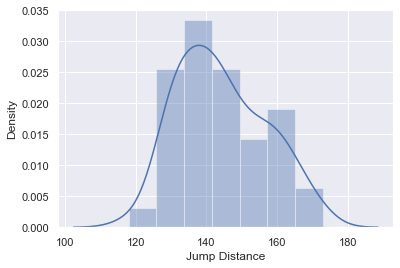

In [8]:
sns.distplot(df['Jump Distance']);

In [13]:
df['Jump Distance'].describe()

count     80.000000
mean     144.300000
std       12.469101
min      118.000000
25%      134.000000
50%      142.000000
75%      153.500000
max      173.000000
Name: Jump Distance, dtype: float64

### Correlation Map

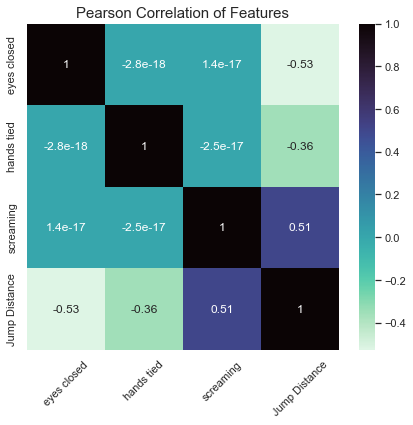

In [16]:
plt.figure(figsize=(7,6))
plt.title('Pearson Correlation of Features', size = 15)
sns.heatmap(df.iloc[:,1:].corr(), cmap = 'mako_r', annot = True)
plt.xticks(rotation=45) 
plt.show()

### Box

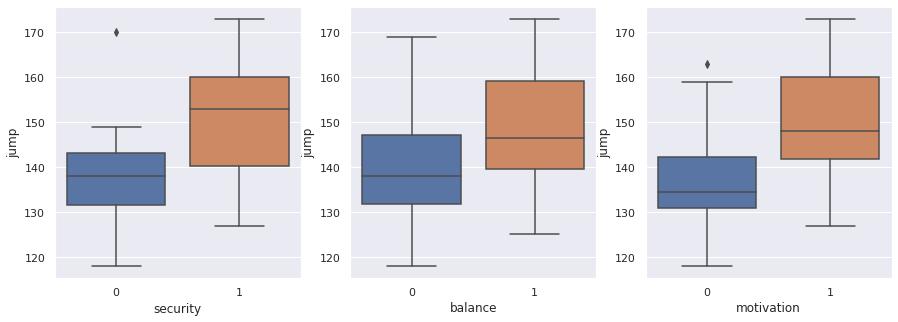

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(df.columns[:-2]):
    sns.boxplot( x=col, y='jump', data=df, ax=axes[i])
plt.show() 

### Violin

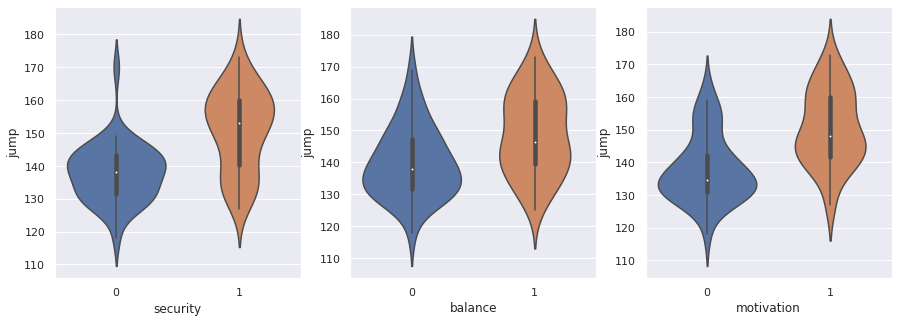

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(df.columns[:-2]):
    sns.violinplot( x=col, y='jump', data=df, ax=axes[i])
plt.show() 

### Scatter

category 'sbm' indicates a jump with 'Security Balance Mativation'. Lack of any letter indicates the lacking of that conduct.

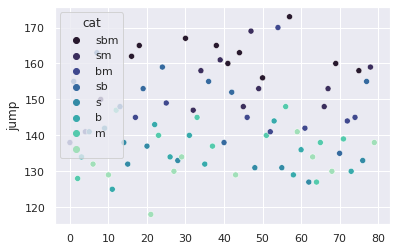

In [ ]:
sns.scatterplot(data=df, y='jump', x=df.index, hue='cat', hue_order=['sbm','sm','bm','sb','s','b','m',' '], palette="mako")

Sorted Scatter

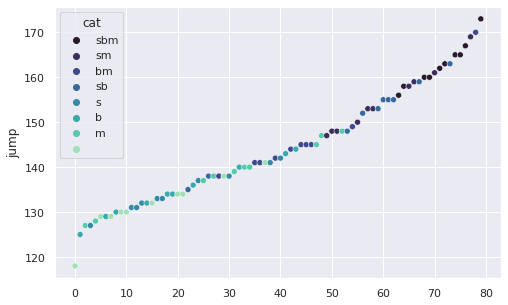

In [ ]:
sns.scatterplot(data=df.sort_values(by='jump'), y='jump', x=df.index, hue='cat', hue_order=['sbm','sm','bm','sb','s','b','m',' '], palette="mako")

## Hypothesis Testing

In [ ]:
regular_jump_mean = df[df['cat']== 'sb']['jump'].mean() # A jump with security(eyes-open) and balance(hands-free) and without motivation (no shouting) considered a regular jump 
regular_jump_mean

151.3

Our null-hypothesis is that a constrained jump (jump with eyes-closed and/or hands-free) would have the same average score on jumping as a regular jump. 

In [ ]:
def hypo_test(data, expectation, p_limit=0.05):
  tset, pval = ttest_1samp(data, expectation)
  result = "rejected" if pval < p_limit else "accepted"
  print("Null hypothesis {0} with p:{1} \n".format(result, round(pval,6) ))

In [ ]:
for cat in ['sbm','sm','bm','sb','s','b','m',' ']:
  print("For setup {0}:".format(cat))
  hypo_test(df[df['cat'] == cat]['jump'], regular_jump_mean)

For setup sbm:
Null hypothesis rejected with p:3.8e-05 

For setup sm:
Null hypothesis accepted with p:0.174276 

For setup bm:
Null hypothesis accepted with p:0.094113 

For setup sb:
Null hypothesis accepted with p:1.0 

For setup s:
Null hypothesis rejected with p:2e-06 

For setup b:
Null hypothesis rejected with p:1.3e-05 

For setup m:
Null hypothesis rejected with p:0.000367 

For setup  :
Null hypothesis rejected with p:3e-06 

